## **importing necessary libraries and data.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import random

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bootcamp-first-project/bootcamp-first-project-datas/turnstile_all.csv',index_col=0)
datacp = data.copy()

## **recognize data**

In [ ]:
datacp.head()

,stop_name,division,line,borough,structure,gtfs_longitude,gtfs_latitude,date,entries,exits
0,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-01,7014.0,7934.0
1,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-02,13367.0,12113.0
2,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-03,9084.0,7892.0
3,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-04,6115.0,5991.0
4,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-05,16376.0,14893.0


7 years(2015-2021) of daily entry and exit data of new york subway stations.

* **stop_name:** station name
* **division:** Each section of the system is assigned a unique line name, usually paired with its original operating company or division (Brooklyn–Manhattan Transit Corporation (BMT).
* **gfts_longitude:** longitude of the station
* **gfts_latitude:** latitude of the station
* **date:** dates of entry and exit
* **entries:** Entrances to the station in one day
* **exits:** exits to the station in one day
* **line:** subway lines on which stations are located
* **borough:** county where the station is located (broklyn,manhattan vs.)
* **structure:** station or subway system architectural structure.

In [ ]:
datacp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118745 entries, 0 to 1118744
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   stop_name       1117882 non-null  object 
 1   division        1117882 non-null  object 
 2   line            1075565 non-null  object 
 3   borough         1075565 non-null  object 
 4   structure       1075565 non-null  object 
 5   gtfs_longitude  1117882 non-null  float64
 6   gtfs_latitude   1117882 non-null  float64
 7   date            1118745 non-null  object 
 8   entries         1118471 non-null  float64
 9   exits           1118471 non-null  float64
dtypes: float64(4), object(6)
memory usage: 93.9+ MB


***Comment***

* We can see that the dataset contains mixture of categorical and numerical variables.

* Categorical variables have data type `object`.

* Numerical variables have data type `float64`.

* Also, there are some missing values in the dataset. We will explore it later.

In [ ]:
np.shape(datacp)

(1118745, 10)

* The dataset consists of 1118745 rows and 10 columns.

In [ ]:
datacp.duplicated().sum()

0

* There are no repeating lines.

In [ ]:
datacp.isnull().sum()

stop_name           863
division            863
line              43180
borough           43180
structure         43180
gtfs_longitude      863
gtfs_latitude       863
date                  0
entries             274
exits               274
dtype: int64

* observing missing values.

## **feature extraction**

In [ ]:
datacp.head()

,stop_name,division,line,borough,structure,gtfs_longitude,gtfs_latitude,date,entries,exits
0,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-01,7014.0,7934.0
1,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-02,13367.0,12113.0
2,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-03,9084.0,7892.0
3,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-04,6115.0,5991.0
4,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,-73.912034,40.775036,2015-01-05,16376.0,14893.0


In [ ]:
datacp["entries_exits"] = datacp.entries + datacp.exits

* creating a new column containing the total entries and exits.

In [ ]:
datacp['gtfs_longitude'] = abs(datacp.gtfs_longitude)
datacp["gtfs_latitude"] = abs(datacp.gtfs_latitude)
datacp["station area"] = datacp.gtfs_latitude * datacp.gtfs_longitude

* adding the stations area as a new column.

In [ ]:
datacp['date'] = datacp.date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

* converting date column from object structure to datetime structure.

In [ ]:
datacp["day"] = datacp.date.dt.day_name()

In [ ]:
datacp["year"] = datacp.date.dt.year

In [ ]:
datacp['month'] = datacp.date.dt.month_name()

* splitting the date column into day, month and year.

In [ ]:
def is_weekday(x):
    if x.weekday()<5:
        return 'weekday'
    else:
        return 'weekend'

datacp['weekday_or_weekend'] = datacp.date.apply(is_weekday)

* creating a column that indicates weekday and weekend.

In [ ]:
datacp.drop(columns="date", axis = 1, inplace=True)

In [ ]:
datacp.head()

,stop_name,division,line,borough,structure,gtfs_longitude,gtfs_latitude,entries,exits,entries_exits,station area,day,year,month,weekday_or_weekend
0,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,7014.0,7934.0,14948.0,3013.765847,Thursday,2015,January,weekday
1,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,13367.0,12113.0,25480.0,3013.765847,Friday,2015,January,weekday
2,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,9084.0,7892.0,16976.0,3013.765847,Saturday,2015,January,weekend
3,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,6115.0,5991.0,12106.0,3013.765847,Sunday,2015,January,weekend
4,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,16376.0,14893.0,31269.0,3013.765847,Monday,2015,January,weekday


# **data visualization**

In [ ]:
corr_nm = datacp.corr()

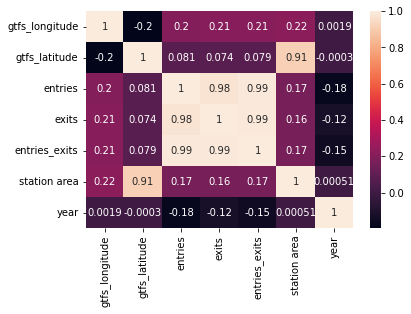

In [ ]:
sns.heatmap(corr_nm, annot=True)

* Since gtfs longitude, gtfs latitude and station area do not correlate with total entries/exits, we omit it from the data.

YEAR

In [ ]:
year = datacp.groupby("year").agg({"entries":"mean","exits":"mean"}).reset_index().sort_values(['entries'],ascending=[False])
year.head(7)

,year,entries,exits
0,2015,11670.643215,8950.841286
1,2016,11545.320398,8738.157931
2,2017,11435.334114,8738.909184
4,2019,11331.146039,9053.900710
3,2018,11250.048682,8679.707908
5,2020,4060.993047,3741.674422
6,2021,4007.187125,4567.096192


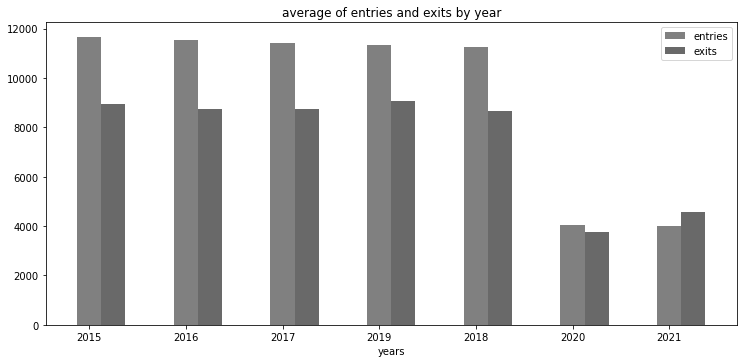

In [ ]:
fig = plt.figure(figsize=[12,7])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
years = list(year.year)
indeks = np.arange(len(years))
a = 0.25
entries = list(year.entries)
exits = list(year.exits)
chart.bar(indeks,entries,width=a, label = "entries",color="#808080") 
chart.bar(indeks+a,exits,width=a, label = "exits",color="#696969")
chart.set_title("average of entries and exits by year")
chart.set_xlabel("years")
chart.set_xticks(ticks = indeks) 
chart.set_xticklabels(labels=years) 
chart.legend()
plt.show()

* In 2020 and 2021, there has been a decrease in total entries and exits due to the effect of the pandemic.
* While analyzing on a month, day and station basis, it does not provide us with descriptive analyzes in 2020 and 2021, so we will exclude it from our data in these years.

In [ ]:
datacp1 = datacp.set_index("year")

In [ ]:
datacp1.drop(index=[2020,2021], inplace=True)

In [ ]:
datacp1.reset_index()

,year,stop_name,division,line,borough,structure,gtfs_longitude,gtfs_latitude,entries,exits,entries_exits,station area,day,month,weekday_or_weekend
0,2015,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,7014.0,7934.0,14948.0,3013.765847,Thursday,January,weekday
1,2015,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,13367.0,12113.0,25480.0,3013.765847,Friday,January,weekday
2,2015,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,9084.0,7892.0,16976.0,3013.765847,Saturday,January,weekend
3,2015,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,6115.0,5991.0,12106.0,3013.765847,Sunday,January,weekend
4,2015,Astoria - Ditmars Blvd,BMT,Astoria,Q,Elevated,73.912034,40.775036,16376.0,14893.0,31269.0,3013.765847,Monday,January,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797776,2019,Journal Sq,PTH,NaN,NaN,NaN,74.068633,40.730304,22208.0,21824.0,44032.0,3016.837941,Friday,December,weekday
797777,2019,Journal Sq,PTH,NaN,NaN,NaN,74.068633,40.730304,17177.0,19700.0,36877.0,3016.837941,Saturday,December,weekend
797778,2019,Journal Sq,PTH,NaN,NaN,NaN,74.068633,40.730304,12084.0,16902.0,28986.0,3016.837941,Sunday,December,weekend
797779,2019,Journal Sq,PTH,NaN,NaN,NaN,74.068633,40.730304,21062.0,42026.0,63088.0,3016.837941,Monday,December,weekday


In [ ]:
datacp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797781 entries, 2015 to 2019
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   stop_name           797158 non-null  object 
 1   division            797158 non-null  object 
 2   line                767166 non-null  object 
 3   borough             767166 non-null  object 
 4   structure           767166 non-null  object 
 5   gtfs_longitude      797158 non-null  float64
 6   gtfs_latitude       797158 non-null  float64
 7   entries             797545 non-null  float64
 8   exits               797545 non-null  float64
 9   entries_exits       797545 non-null  float64
 10  station area        797158 non-null  float64
 11  day                 797781 non-null  object 
 12  month               797781 non-null  object 
 13  weekday_or_weekend  797781 non-null  object 
dtypes: float64(6), object(8)
memory usage: 91.3+ MB


BOROUGH

In [ ]:
borough = datacp1.groupby("borough").agg({"entries_exits":"mean"}).reset_index().sort_values(['entries_exits'], ascending=[False])
borough.head()

,borough,entries_exits
2,M,40851.248482
3,Q,15209.356351
0,Bk,11358.203594
1,Bx,9663.253591
4,SI,5863.857143


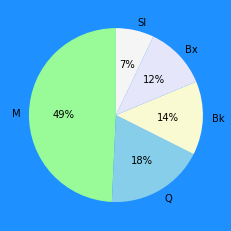

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(facecolor="#1E90FF")
plt.pie(borough.entries_exits, labels=borough.borough,autopct='%1.0f%%', startangle=90,colors=["#98FB98","#87CEEB","#FAFAD2","#E6E6FA","#F5F5F5"])
plt.show()
plt.savefig("/content/drive/MyDrive/bootcamp-first-project/borough_pie.jpeg")

* Almost half of the average entries and exits took place in Manhattan.
* At least the average daily entries and exitss took place in Staten Island.

STRUCTURE

In [ ]:
structure = datacp1.groupby("structure").agg({"entries":"mean","exits":"mean"}).reset_index().sort_values(['entries'], ascending=[False])
structure.head(20)

,structure,entries,exits
3,Subway,16086.099774,12550.188275
2,Open Cut,5729.609920,4114.778274
1,Elevated,5697.993992,3878.965456
4,Viaduct,3389.740307,3162.224312
0,At Grade,2691.828070,1639.250762


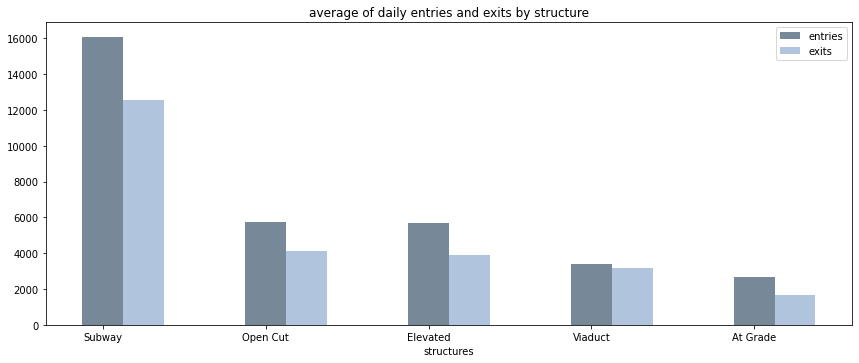

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=[14,7])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
structures = list(structure.structure)
indeks = np.arange(len(structures))
a = 0.25
entries_structure = list(structure.entries)
exits_structure = list(structure.exits)
chart.bar(indeks,entries_structure,width=a, label = "entries",color="#778899") 
chart.bar(indeks+a,exits_structure,width=a, label = "exits",color="#B0C4DE")
chart.set_title("average of daily entries and exits by structure")
chart.set_xlabel("structures")
chart.set_xticks(ticks = indeks) 
chart.set_xticklabels(labels=structures) 
chart.legend()
plt.show()
plt.savefig("/content/drive/MyDrive/bootcamp-first-project/structure")

* The daily average entrances and exits of the stations with the subway structure are ahead by a wide margin.

LİNE

In [ ]:
datacp1.line.nunique()

32

In [ ]:
line = datacp1.groupby("line").agg({"entries_exits":"mean"}).reset_index().sort_values(['entries_exits'], ascending=[False]).head(10)
line

,line,entries_exits
9,Clark St,54649.767566
14,Flushing,51926.748077
19,Lexington Av,44410.375198
29,Second Av,37300.050182
24,Queens - Archer,36548.986304
5,Broadway,35699.257774
2,6th Av - Culver,27054.444343
6,Broadway - 7Av,25190.485020
28,Sea Beach / West End / Culver / Brighton,25173.608981
8,Canarsie,24513.511712


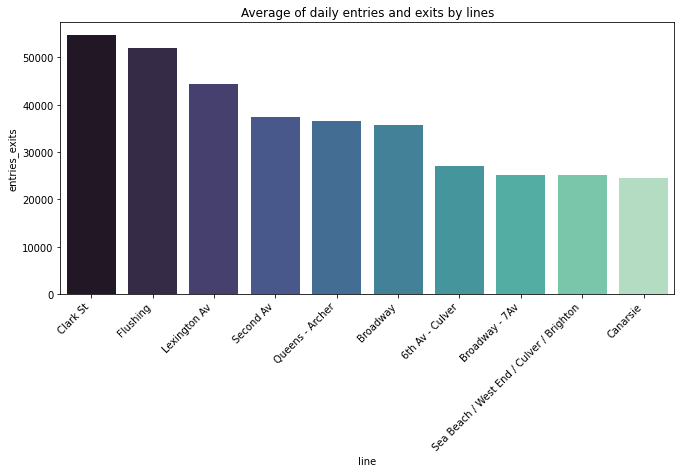

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x="line", y="entries_exits", data=line, palette="mako")
plt.title("Average of daily entries and exits by lines")
plt.xticks(rotation=45, ha='right');

* daily average entrances and exits of the 10 busiest lines.

DİVİSİON

In [ ]:
datacp.division.nunique()

7

In [ ]:
division = datacp1.groupby("division").agg({"entries_exits":"mean"}).reset_index().sort_values(['entries_exits'], ascending=[False]).head(7)
division

,division,entries_exits
4,PTH,32082.865134
2,IRT,23393.313293
1,IND,19655.608432
0,BMT,16395.718700
3,JFK,10525.444825
6,SIR,5863.857143
5,RIT,3514.827206


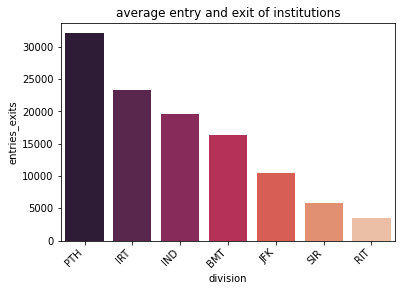

In [ ]:
plt.figure()
sns.barplot(x="division",y="entries_exits", data=division, palette="rocket")
plt.xticks(rotation=45, ha='right')
plt.title("average entry and exit of institutions");

STATİON

In [ ]:
station = datacp1.groupby("stop_name").agg({"entries":"mean","exits":"mean"}).reset_index().sort_values(['entries'], ascending=[False]).head(10)
station

,stop_name,entries,exits
338,Times Sq - 42 St,179913.506024,149833.015334
225,Grand Central - 42 St,125573.605696,115123.001643
59,34 St - Herald Sq,108397.442497,96698.181818
341,Union Sq - 14 St,94430.567420,81980.415469
14,14 St - Union Sq,87991.175342,82266.726027
265,Lexington Av/59 St,80685.821918,78943.260274
60,34 St - Penn Station,72328.876780,63016.437295
82,59 St - Columbus Circle,63640.887185,50390.444688
187,Cortlandt St,57094.010267,36359.738535
210,Flushing - Main St,51303.930449,42170.906900


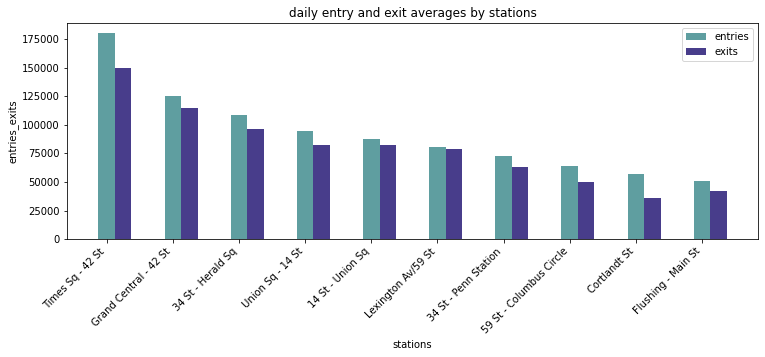

In [ ]:
fig = plt.figure(figsize=[12,5])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
stations = list(station.stop_name)
indeks = np.arange(len(stations))
a = 0.25
entries_station = list(station.entries)
exits_station = list(station.exits)
chart.bar(indeks,entries_station,width=a, label = "entries",color="#5F9EA0") 
chart.bar(indeks+a,exits_station,width=a, label = "exits",color="#483D8B")
plt.xticks(rotation=45, ha='right')
chart.set_title("daily entry and exit averages by stations")
chart.set_xlabel("stations")
chart.set_ylabel("entries_exits")
chart.set_xticks(ticks = indeks) 
chart.set_xticklabels(labels=stations)
chart.legend()
plt.show()

* 10 stations with the highest daily average entrances and exits.

**DAYS**

In [ ]:
weekday_or_weekend = datacp1.groupby("weekday_or_weekend").agg({"entries_exits":"mean"}).reset_index().sort_values(['entries_exits'],ascending=[False])
weekday_or_weekend.head(2)

,weekday_or_weekend,entries_exits
0,weekday,23410.039213
1,weekend,12466.506865


In [ ]:
day = datacp1.groupby('day').agg({"entries":"mean","exits":"mean"}).reset_index().sort_values(['entries'], ascending=[False])
day.head(7)


,day,entries,exits
6,Wednesday,13719.509630,10449.293512
4,Thursday,13585.224251,10352.017707
5,Tuesday,13415.190839,10226.184017
0,Friday,13307.590845,10186.432017
1,Monday,12375.195996,9438.332626
2,Saturday,7671.607616,6213.921262
3,Sunday,6073.003699,4974.418967


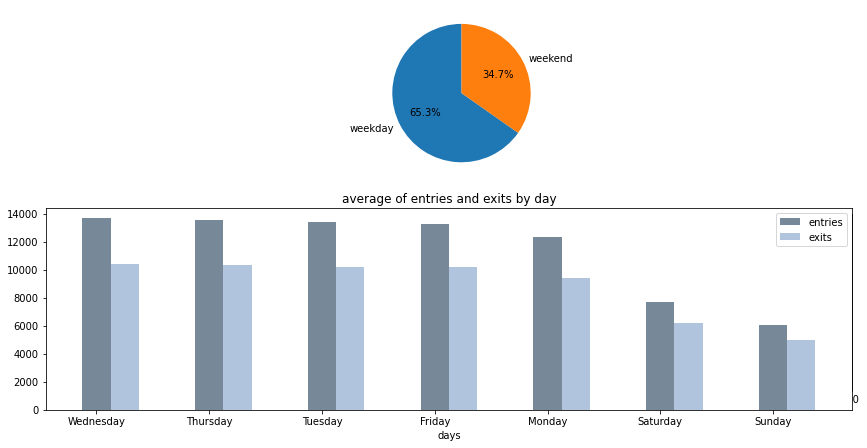

In [ ]:
fig = plt.figure(figsize=[14,7])
plt.subplot(2,1,1)
plt.pie(weekday_or_weekend.entries_exits, labels=weekday_or_weekend.weekday_or_weekend, autopct='%1.1f%%', startangle=90)
plt.subplot(2,1,2)
chart = fig.add_axes([0.1,0.08,0.8,0.4])
days = list(day.day)
indeks = np.arange(len(days))
a = 0.25
entries_day = list(day.entries)
exits_day = list(day.exits)
chart.bar(indeks,entries_day,width=a, label = "entries",color="#778899") 
chart.bar(indeks+a,exits_day,width=a, label = "exits",color="#B0C4DE")
chart.set_title("average of entries and exits by day")
chart.set_xlabel("days")
chart.set_xticks(ticks = indeks)
chart.set_xticklabels(labels=days) 
chart.legend()
plt.show()

* At the stations, weekends are busier than weekdays.
* especially on Sundays, daily average entries and exits decreased.

MONTH

In [ ]:
month = datacp1.groupby("month").agg({"entries":"mean","exits":"mean"}).reset_index().sort_values(['entries'],ascending=[False])
month.head(12)

,month,entries,exits
10,October,12102.820218,9313.358869
6,June,11901.163551,9208.882288
8,May,11856.820590,9082.419240
0,April,11779.146718,9046.944382
7,March,11697.886098,8924.717710
9,November,11578.418245,8906.975502
11,September,11575.538571,8945.709286
3,February,11184.434106,8550.237356
2,December,11131.940450,8627.593478
5,July,10974.056328,8609.622697


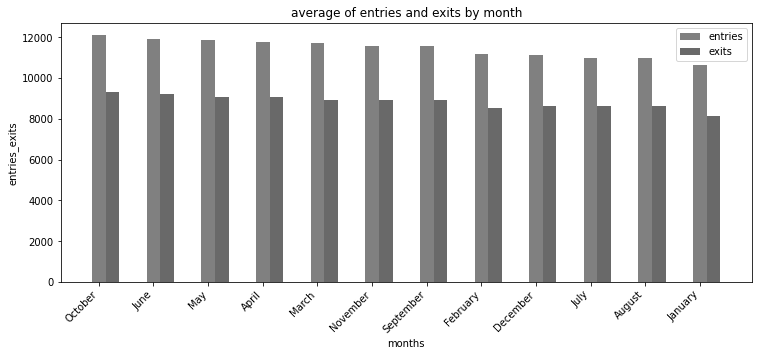

In [ ]:
fig = plt.figure(figsize=[12,6])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
months = list(month.month)
indeks = np.arange(len(months))
a = 0.25
entries_month = list(month.entries)
exits_month = list(month.exits)
chart.bar(indeks,entries_month,width=a, label = "entries",color="#808080") 
chart.bar(indeks+a,exits_month,width=a, label = "exits",color="#696969")
plt.xticks(rotation=45, ha='right')
chart.set_title("average of entries and exits by month")
chart.set_xlabel("months")
chart.set_ylabel("entries_exits")
chart.set_xticks(ticks = indeks) 
chart.set_xticklabels(labels=months) 
chart.legend()
plt.show()

* It is seen that the spring months are relatively busier than the other months.